In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [3]:
# Load the dataset
road_stats_df = pd.read_csv(r"C:\Users\Najla\Downloads\road-statistics-.csv")

# Set the aesthetic style of the plots
sns.set_style("whitegrid")



# Distribution of Roads by Region and Engineering Classification

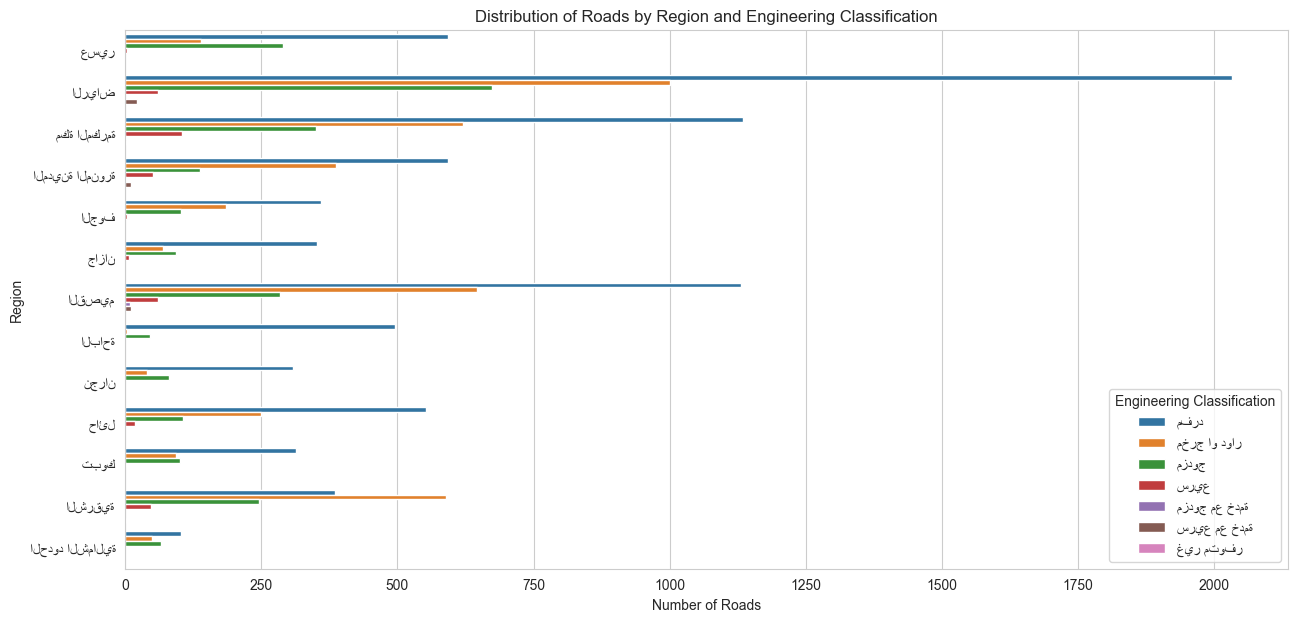

In [5]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of roads by region and engineering classification
plt.figure(figsize=(15, 7))
sns.countplot(y='المنطقة', hue='التصنيف الهندسي للطريق عربي', data=road_stats_df)
plt.title('Distribution of Roads by Region and Engineering Classification')
plt.xlabel('Number of Roads')
plt.ylabel('Region')
plt.legend(title='Engineering Classification')
plt.show()

# Analysis of Road Conditions

<Figure size 1500x700 with 0 Axes>

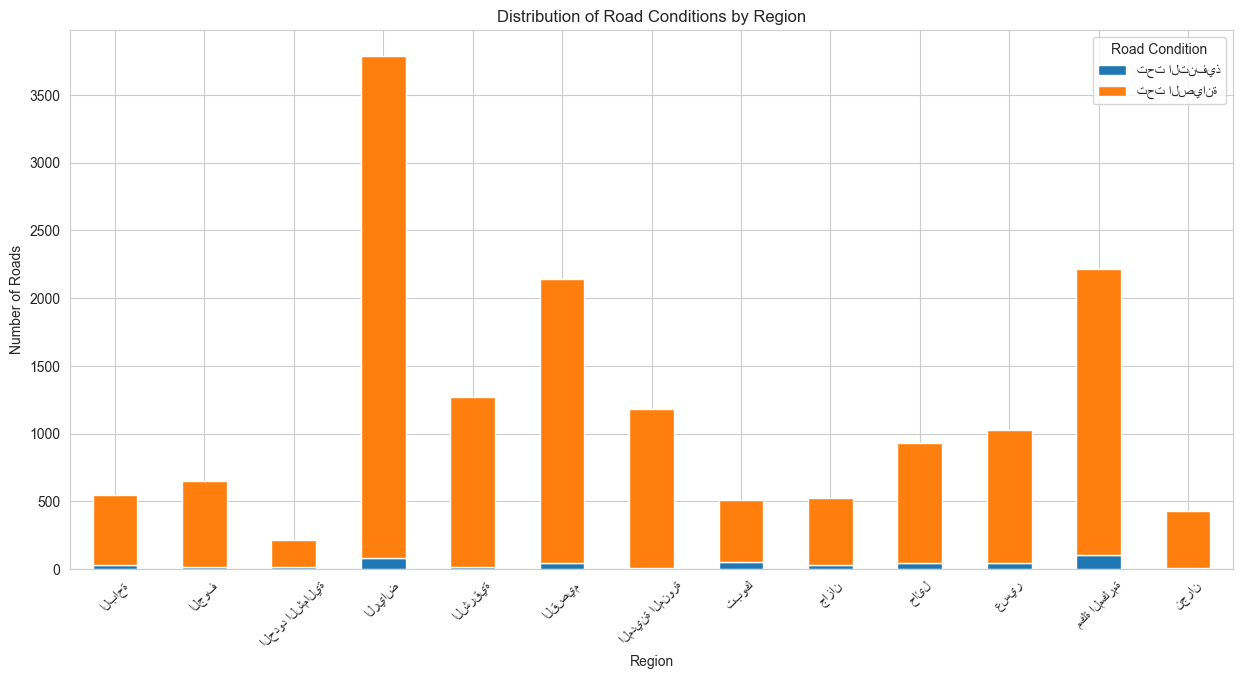

In [6]:
# Analysis of road conditions by region
road_condition_grouped = road_stats_df.groupby(['المنطقة', 'حالة الطريق عربي']).size().unstack(fill_value=0)

# Plotting the distribution of road conditions by region
plt.figure(figsize=(15, 7))
road_condition_grouped.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Distribution of Road Conditions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Roads')
plt.legend(title='Road Condition')
plt.xticks(rotation=45)
plt.show()


# Analysis of the Engineering Length of Roads

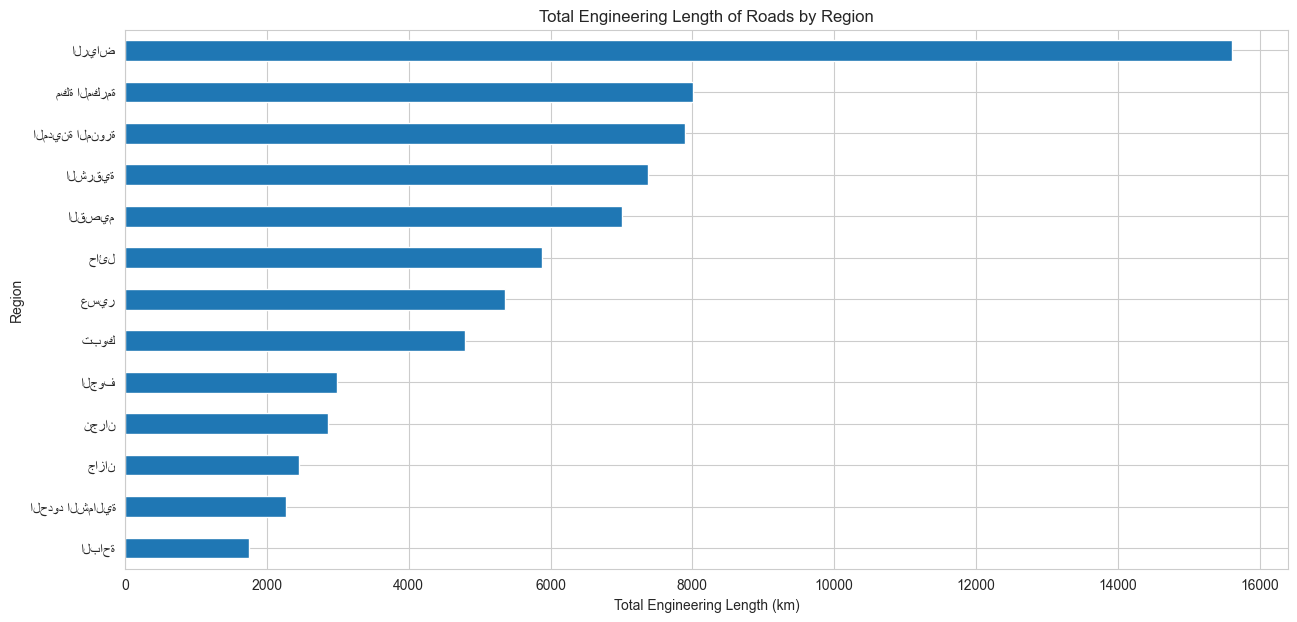

In [7]:
# Analysis of the engineering length of roads by region
road_length_stats = road_stats_df.groupby('المنطقة')['الطول الهندسي الطريق'].agg(['sum', 'mean', 'max'])

# Plotting the total engineering length of roads by region
plt.figure(figsize=(15, 7))
road_length_stats['sum'].sort_values().plot(kind='barh')
plt.title('Total Engineering Length of Roads by Region')
plt.xlabel('Total Engineering Length (km)')
plt.ylabel('Region')
plt.show()


# Distribution of Road Ownership

<Figure size 1500x1000 with 0 Axes>

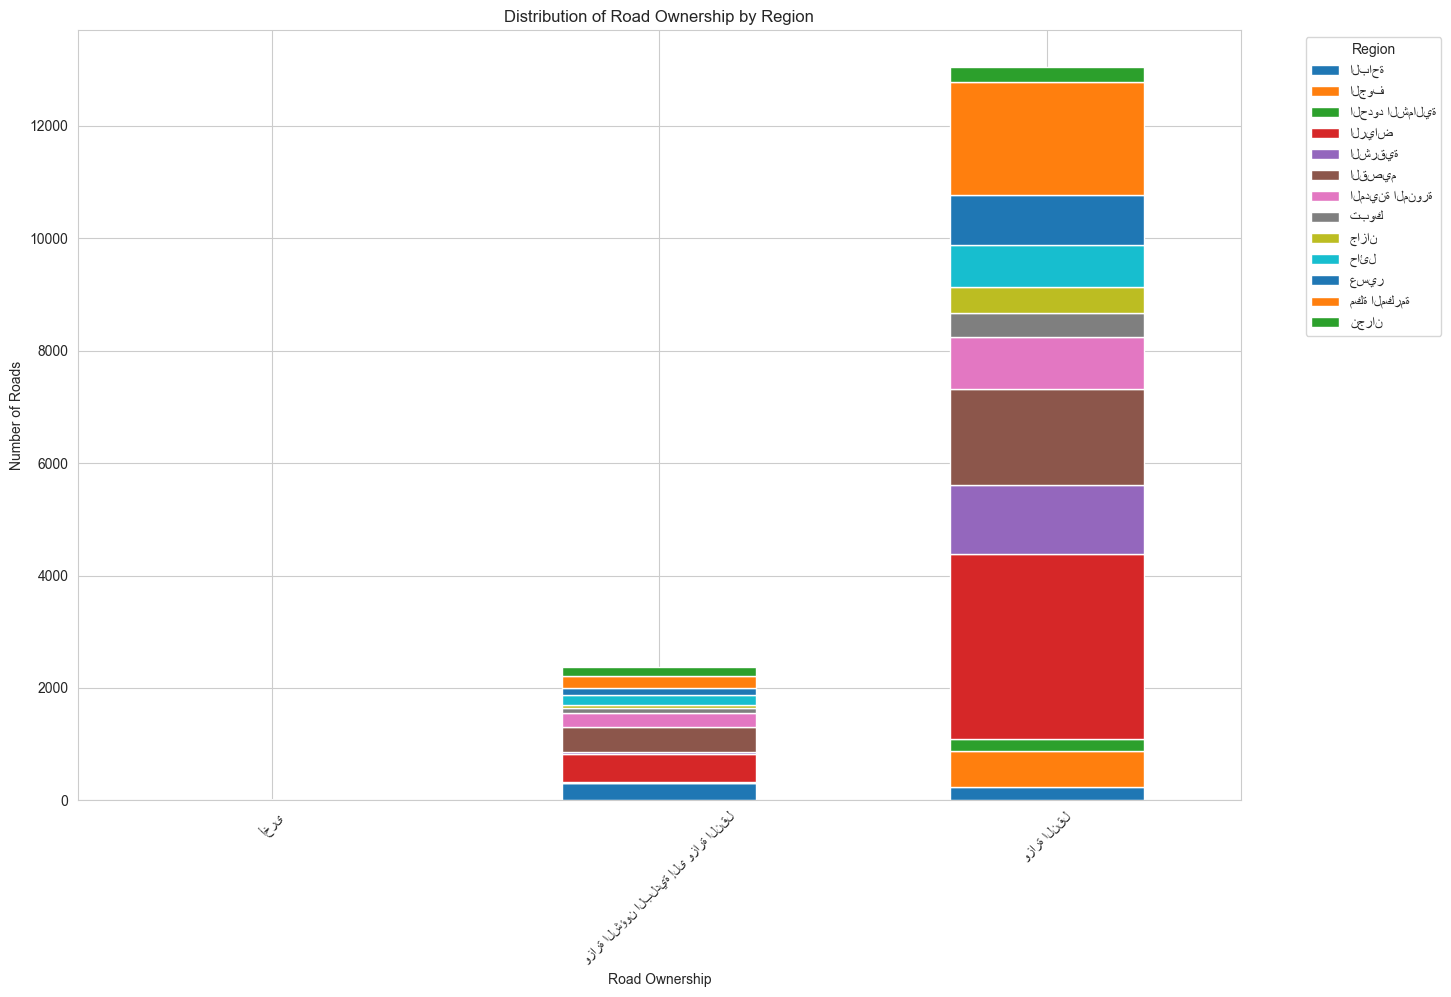

In [8]:
# Analysis of road ownership distribution
road_ownership_distribution = road_stats_df.groupby(['ملكية الطريق عربي', 'المنطقة']).size().unstack(fill_value=0)

# Plotting the distribution of road ownership by region
plt.figure(figsize=(15, 10))
road_ownership_distribution.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Distribution of Road Ownership by Region')
plt.xlabel('Road Ownership')
plt.ylabel('Number of Roads')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


# Clustering Analysis (التحليل العنقودي)

C:\Users\Najla\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


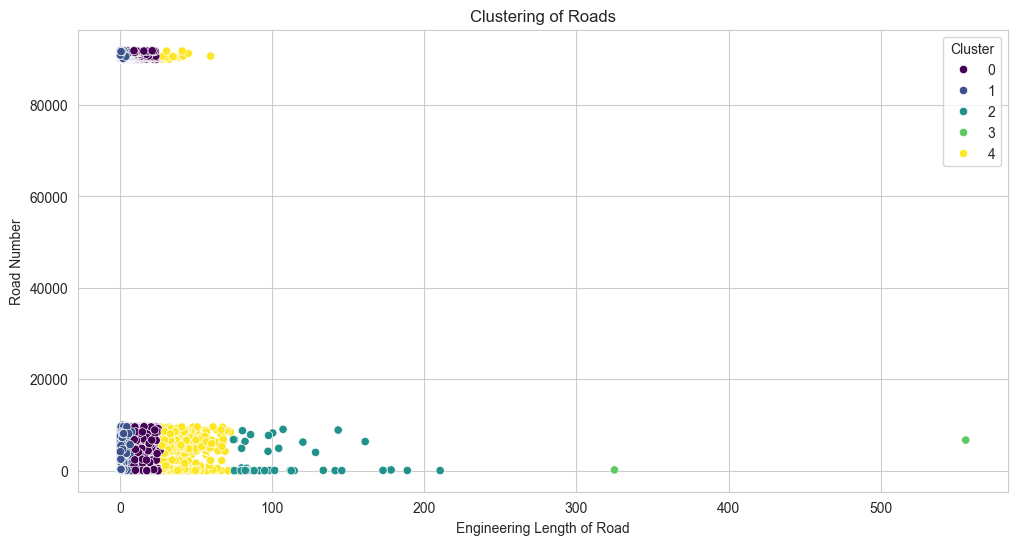

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare your data
road_stats_df = pd.read_csv(r"C:\Users\Najla\Downloads\road-statistics-.csv")
le = LabelEncoder()

# Encoding categorical variables
road_stats_df_encoded = road_stats_df.copy()
road_stats_df_encoded['اتجاه الطريق عربي'] = le.fit_transform(road_stats_df_encoded['اتجاه الطريق عربي'])
road_stats_df_encoded['التصنيف الهندسي للطريق عربي'] = le.fit_transform(road_stats_df_encoded['التصنيف الهندسي للطريق عربي'])
road_stats_df_encoded['حالة الطريق عربي'] = le.fit_transform(road_stats_df_encoded['حالة الطريق عربي'])
road_stats_df_encoded['المنطقة'] = le.fit_transform(road_stats_df_encoded['المنطقة'])

# Selecting features for clustering
features = road_stats_df_encoded[['اتجاه الطريق عربي', 'التصنيف الهندسي للطريق عربي', 'حالة الطريق عربي', 'الطول الهندسي الطريق', 'المنطقة']]

# Performing KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(features)

# Adding cluster information to the original dataframe
road_stats_df['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=road_stats_df, x='الطول الهندسي الطريق', y='رقم الطريق', hue='Cluster', palette='viridis')
plt.title('Clustering of Roads')
plt.xlabel('Engineering Length of Road')
plt.ylabel('Road Number')
plt.show()


# Correlation Analysis (تحليل الارتباط)

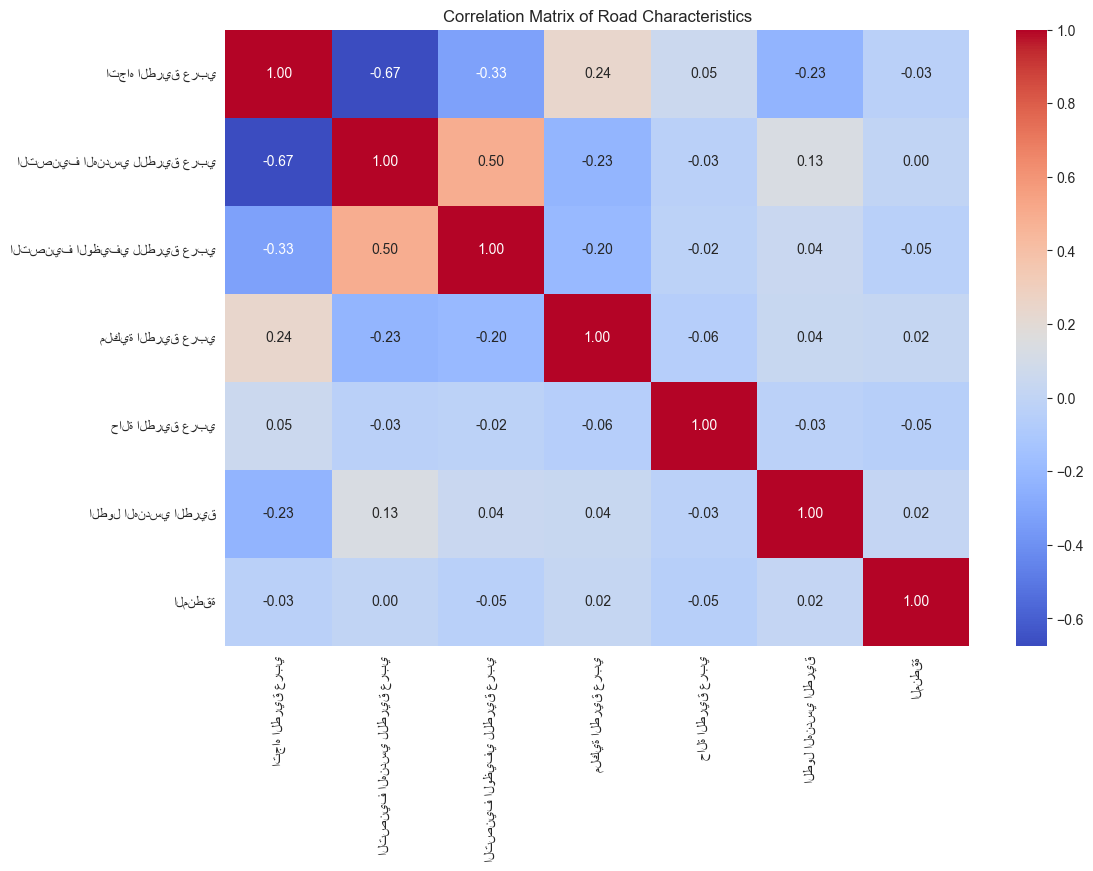

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparing data for correlation analysis
# Converting categorical data to numerical for correlation analysis
road_stats_df_encoded['التصنيف الوظيفي للطريق عربي'] = le.fit_transform(road_stats_df_encoded['التصنيف الوظيفي للطريق عربي'])
road_stats_df_encoded['ملكية الطريق عربي'] = le.fit_transform(road_stats_df_encoded['ملكية الطريق عربي'])

# Selecting relevant features for correlation analysis
correlation_features = road_stats_df_encoded[['اتجاه الطريق عربي', 'التصنيف الهندسي للطريق عربي', 'التصنيف الوظيفي للطريق عربي', 'ملكية الطريق عربي', 'حالة الطريق عربي', 'الطول الهندسي الطريق', 'المنطقة']]

# Calculating correlation matrix
correlation_matrix = correlation_features.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Road Characteristics')
plt.show()


In [12]:
from scipy import stats
import pandas as pd


# Preparing data for ANOVA
# Grouping the road lengths by region
groups = road_stats_df.groupby('المنطقة')['الطول الهندسي الطريق'].apply(list)

# Performing ANOVA
anova_result = stats.f_oneway(*groups)

# Displaying the ANOVA result
print(anova_result)


F_onewayResult(statistic=25.83899209014117, pvalue=1.5242042222595793e-58)


# F-statistic: 25.839
قيمة الدلالة الإحصائية 
(p-value): حوالي 1.52e-58
تفسير النتائج:
قيمة F-statistic المرتفعة تشير إلى وجود اختلاف كبير بين المجموعات.
p-value صغيرة جدًا (أقل من 0.05)، مما يعني أن الاختلافات بين متوسطات الطول الهندسي للطرق في المناطق المختلفة هي اختلافات معنوية إحصائيًا.
استنتاج:
تشير النتائج إلى أن هناك اختلافات معنوية في الطول الهندسي للطرق بين المناطق المختلفة. هذا يمكن أن يعكس اختلافات في التخطيط الحضري، الاستثمار في البنية التحتية، أو طبيعة الأراضي في

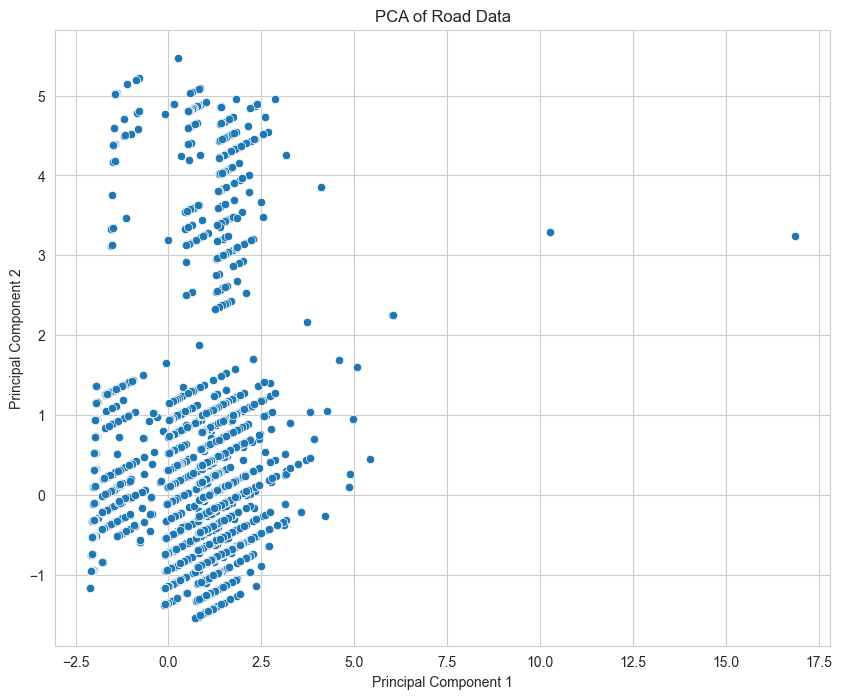

[0.35406897 0.20878645]


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Initializing the Label Encoder
le = LabelEncoder()

# Selecting numerical and categorical columns for PCA
numerical_cols = ['الطول الهندسي الطريق']
categorical_cols = ['اتجاه الطريق عربي', 'التصنيف الهندسي للطريق عربي', 
                    'حالة الطريق عربي', 'المنطقة']

# Encoding categorical data
road_stats_df_encoded = road_stats_df.copy()
for col in categorical_cols:
    road_stats_df_encoded[col] = le.fit_transform(road_stats_df[col])

# Combining numerical and encoded categorical data
pca_data = road_stats_df_encoded[numerical_cols + categorical_cols]

# Standardizing the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(pca_data_scaled)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Road Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Displaying the variance explained by each component
print(pca.explained_variance_ratio_)
